CA04-Ensemble Models

Part 1. Upload & Encode Data


In [ ]:
#import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read csv file as dataframe 
df = pd.read_csv('census_data.csv')
#split data into train and test 
df_train = df[df['flag']=='train']
df_test = df[df['flag']=='test']

In [ ]:
# encode categorical columns into numeric 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
census_data_encode_Train = df_train.apply(le.fit_transform) #encode training data
census_data_encode_Test = df_test.apply(le.fit_transform) #encode testing data

In [ ]:
#create X and Y variables for test and training set
feature_columns = ['hours_per_week_bin', 
                   'occupation_bin', 
                   'msr_bin', 
                   'capital_gl_bin', 
                   'race_sex_bin', 
                   'education_num_bin', 
                   'education_bin',
                   'workclass_bin', 
                   'age_bin' ]
X_train = census_data_encode_Train[feature_columns]
Y_train = census_data_encode_Train.y
X_test = census_data_encode_Test[feature_columns]
Y_test = census_data_encode_Test.y

Part 2: Build Random Forest Model

In [ ]:
#import ensemble method packages from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#RandomForestClassifier:
clf = RandomForestClassifier(n_estimators = 100,
                             max_features='auto', random_state = 0)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

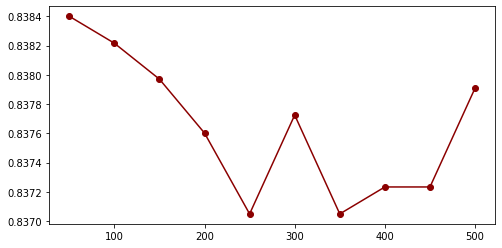

In [ ]:
#Plot Accuracy v. n_estimator
results = []
n_estimator_list = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_list: #iterate through values in list
    model = RandomForestClassifier(n_estimators=trees, random_state=101) #use each value as n_estimat to fit model
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(Y_test==y_pred)
    results.append(accuracy) #append accuracy results from each model iteration to list

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_list).plot(color="darkred", marker="o") #plot results outcome 

Part 4: Build AdaBoost, Gradient Boost & XGB

In [ ]:
#AdaBoost 
clf1 = AdaBoostClassifier(n_estimators=100)
clf1.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

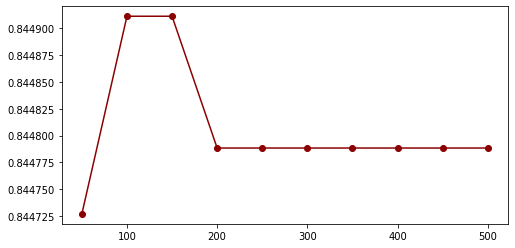

In [ ]:
#Plot Accuracy v. n_estimator
results = []
n_estimator_list = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_list: #iterate through values in list
    model = AdaBoostClassifier(n_estimators=trees, random_state=101) #use each value as n_estimat in model
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(Y_test==y_pred)
    results.append(accuracy) #append accuracy score of each iteration to a list

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_list).plot(color="darkred", marker="o") #plot results outcome 

In [ ]:
#Gradient Boost
clf2 = GradientBoostingClassifier(n_estimators = 100, random_state=101)
clf2.fit(X_train, Y_train)
y_pred = clf2.predict(X_test)

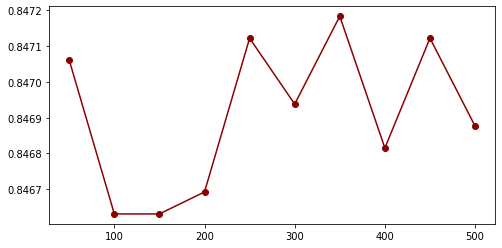

In [ ]:
#Plot Accuracy v. n_estimator
results = []
n_estimator_list = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_list: #iterate through values in list
    model = GradientBoostingClassifier(n_estimators=trees, random_state=101) #use each value as n_estimat in model
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(Y_test==y_pred)
    results.append(accuracy) #append accuracy score from each model to list

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_list).plot(color="darkred", marker="o") #plot outcome of each model score

In [ ]:
#XGB
import xgboost
from xgboost import XGBRFClassifier

clf3 = XGBRFClassifier(n_estimators = 100)
clf3.fit(X_train, Y_train)
y_pred = (X_test)

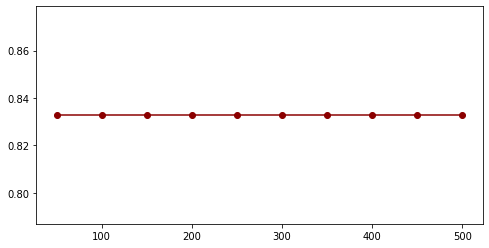

In [ ]:
#Plot Accuracy v. n_estimator
results = []
n_estimator_list = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_list: #iterate through values in list
    model = XGBRFClassifier(n_estimators=trees) #use each value as estimator in model
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(Y_test==y_pred) 
    results.append(accuracy) #append accuracy score from trained model to list

plt.figure(figsize=(8,4)) 
pd.Series(results, n_estimator_list).plot(color="darkred", marker="o") #plot list of accuracy scores

Part 5: Compare Performance

In [ ]:
#import metrics to get Accuracy and AUC scores
from sklearn import metrics 

In [ ]:
#Create Function to Run Each Model Again:

def random_forest_automation():
    rf_automate = RandomForestClassifier(n_estimators=100, #use same hyperparameters and define model
                                        max_features='auto', 
                                        random_state=101)
    rf_automate.fit(X_train, Y_train) #fit RF model
    y_pred = rf_automate.predict(X_test)#create prediction
    rf_accuracy = (metrics.accuracy_score(Y_test, y_pred)) #get accuracy score
    rf_AUC = (roc_auc_score(Y_test, y_pred)) #get AUC score

    title_scores = [{'Accuracy': rf_accuracy},
                    {'AUC': rf_AUC}] #add scores to dictionary
    results = pd.DataFrame(title_scores, index=[{'Accuracu', 'AUC'}]) #transform dictionary into DataFrame 
    return results

In [ ]:
def AdaBoost_automation():
    ad_automate = AdaBoostClassifier(n_estimators=100) #define model
    ad_automate.fit(X_train, Y_train) #fit Ada model
    y_pred = ad_automate.predict(X_test) #make prediction
    ad_accuracy = (metrics.accuracy_score(Y_test, y_pred)) #get accuracy score
    ad_AUC = (metrics.auc(Y_test, y_pred)) #get AUC score

    title_scores = [{'Accuracy':ad_accuracy},
                    {'AUC':ad_AUC}] #add scores to dictionary
    results = pd.DataFrame(title_scores, index =[{'Accuracy', 'AUC'}]) #transform dictionary to dataframe
    return results 

AdaBoost_automation

<function __main__.AdaBoost_automation>

In [ ]:
def gradient_boost_automation(): 
    gb_automate=GradientBoostingClassifier(n_estimators=100) #define model
    gb_automate.fit(X_train, Y_train) #fit gb model
    y_pred = gb_automate.predict(X_test) #make prediction
    gb_accuracy = (metrics.accuracy_score(Y_test, y_pred)) #get accuracy score
    gb_AUC = (metrics.auc(Y_test, y_pred)) #get AUC score

    title_scores = [{'Accuracy':gb_accuracy}, #add scores to dictionary
                    {'AUC':gb_AUC}]
    results = pd.DataFrame(title_scores, index=[{'Accuracy', 'AUC'}]) #transform dictionary into dataframe
    return results 

gradient_boost_automation

<function __main__.gradient_boost_automation>

In [ ]:
def xgb_automation():
    xg_automate=XGBRFClassifier(n_estimators=100)
    xg_automate.fit(X_train, Y_train) #fit xg model
    y_pred = xg_automate.predict(X_test) #make prediction
    xg_accuracy = (metrics.accuracy_score(Y_test, y_pred)) #get accuracy score
    xg_AUC=(metrics.auc(Y_test, y_pred)) #get AUC score

    title_scores = [{'Accuracy': xg_accuracy}, #add scores to dictionary
            {'AUC': xg_AUC}]
    results = pd.DataFrame(title_scores, index =[{'Accuracy', 'AUC'}]) #transform dictionary to dataframe
    return results

xgb_automation

<function __main__.xgb_automation>

In [ ]:
#Create Performance Comparison Table 
comparison = pd.concat([random_forest_automation, AdaBoost_automation, gradient_boost_automation, xgb_automation]) 
#concat results of all DF's together
comparison.columns=['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB'] #set column headings 
print(comparison) #show DataFrame

TypeError: ignored